# Importing Libraries
Numpy, Pandas, Matplotlib(pyplot) and fbprophet (Facebook's API used for prediction and forecasts.)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/GOOGL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-22,1403.900024,1417.000000,1395.949951,1413.239990,1413.239990,1427200
1,2020-05-26,1441.959961,1445.109985,1419.400024,1421.369995,1421.369995,2229500
2,2020-05-27,1420.000000,1425.349976,1394.599976,1420.280029,1420.280029,1584200
3,2020-05-28,1400.000000,1444.459961,1399.079956,1418.239990,1418.239990,1758500
4,2020-05-29,1420.430054,1436.729980,1415.979980,1433.520020,1433.520020,1852200


# Visualization of the "Close" column.

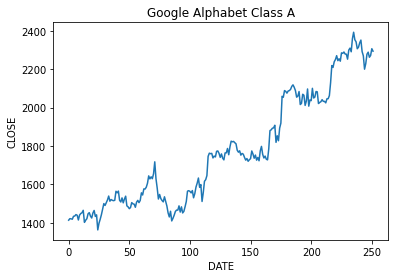

In [33]:
close=data['Close']
ax=close.plot(title="Google Alphabet Class A")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

We only need two columns from this dataset which are date and close.

In [34]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

We are using Facebook Prophet model,  for predicting the stock prices of Tesla

In [35]:
data=data.rename(columns={"Date":"ds","Close":"y"})

# Prediction

In [36]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-17,3746.038363,3462.828951,4019.288659
613,2022-05-18,3753.080733,3471.439227,4033.700319
614,2022-05-19,3757.200846,3459.136049,4030.654298
615,2022-05-20,3764.095213,3470.657005,4044.022639
616,2022-05-21,3756.403549,3461.444641,4022.037375


# Visualizing the predicted model

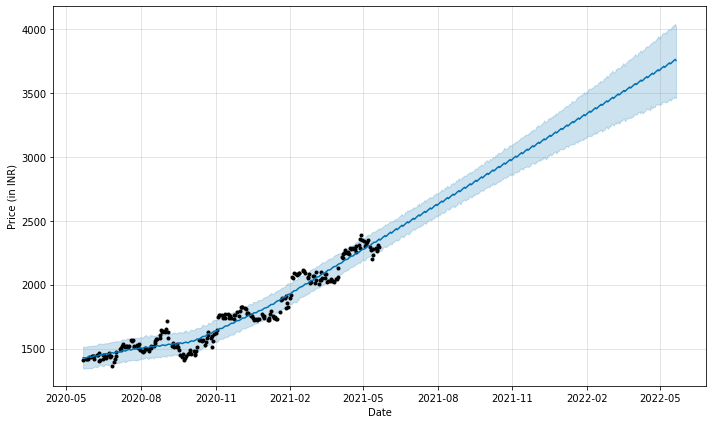

In [37]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price (in INR)")

This is a odd scenario when the model doesn't get enough data on a company's stock prices. Here, in case of Kalyan Jewellers we see a unstable prediction. The graph says it could go as low as -152 or as high as +230. Where the ideal price range lies between -25 and +100. We should not encourage prediction in such a scenario, where the price range is predicted to be so vulnerable.